# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 15

## Problem 1a

First let's set things up for business. 

In [42]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt

## Problem 1a

Having downloaded the Tauxe and Hartl (1997) contribution  from  http://earthref.org/doi/10.1111/j.1365-246X.1997.tb04082.x we can 'unpack' it using the command line **download_magic.py** program. But first, let's find out how to use it... 

In [2]:
!download_magic.py -h


    NAME
        download_magic.py

    DESCRIPTION
        unpacks a magic formatted smartbook .txt file from the MagIC database into the
        tab delimited MagIC format txt files for use with the MagIC-Py programs.

    SYNTAX
        download_magic.py command line options]
    INPUT
        takes either the upload.txt file created by upload_magic.py or the file
        exported by the MagIC v2.2 console software (downloaded from the MagIC database
        or output by the Console on your PC).

    OPTIONS
        -h prints help message and quits
        -i allows interactive entry of filename
        -f FILE specifies input file name
        -sep write location data to separate subdirectories (Location_*)
        -O do not overwrite duplicate Location_* directories while downloading
    


So we just specify the downloaded file on the command line with the -f switch.  Just like most **PmagPy** command line programs in case you hadn't noticed.  Notice the use of the working directory flag (**-WD**) to set input and output directorys. 

In [7]:
!download_magic.py -f magic_contribution_14132.txt -WD Chapter_15

Using default arguments for: -F, -A, -ID, -Fsa, -Fsi, -O, -sep
working on:  'contribution'
1  records written to file  Chapter_15/contribution.txt
contribution  data put in  Chapter_15/contribution.txt
working on:  'locations'
1  records written to file  Chapter_15/locations.txt
locations  data put in  Chapter_15/locations.txt
working on:  'sites'
2332  records written to file  Chapter_15/sites.txt
sites  data put in  Chapter_15/sites.txt
working on:  'samples'
2325  records written to file  Chapter_15/samples.txt
samples  data put in  Chapter_15/samples.txt
working on:  'specimens'
6989  records written to file  Chapter_15/specimens.txt
specimens  data put in  Chapter_15/specimens.txt
working on:  'measurements'
9328  records written to file  Chapter_15/measurements.txt
measurements  data put in  Chapter_15/measurements.txt
working on:  'ages'
2325  records written to file  Chapter_15/ages.txt
ages  data put in  Chapter_15/ages.txt


## Program 1b

Read in the two data files **specimens.txt** and **sites.txt** to see what's in there.  

In [14]:
specimens=pd.read_csv('Chapter_15/specimens.txt',sep='\t',header=1)
specimens.head()

,analysts,citations,description,dir_dec,dir_inc,dir_nrm_origin,dir_polarity,dir_tilt_correction,geologic_classes,geologic_types,...,lithologies,method_codes,result_quality,result_type,sample,scientists,specimen,specimen_alternatives,volume,weight
0,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,sedimentary,sedimentary layer,...,nannofossil ooze,FS-C-DRILL-DSDP:FS-C-PISTON-H,NaN,NaN,15-1-013,Lisa Tauxe:Paul Hartl,15-1-013,3109.0,0.000001,0.001048
1,NaN,This study,Declination rotated section mean=0/180;rel int...,268.5,-41.2,p,n,NaN,NaN,NaN,...,NaN,DE-BFL:LP-PI-IRM:LP-PI-REL:LT-AF-Z,g,NaN,15-1-013,NaN,15-1-013,NaN,NaN,NaN
2,Lisa Tauxe:Paul Hartl,Tauxe & Yamazaki 2007:This study,15-1-013,268.5,-41.2,p,n,100.0,NaN,NaN,...,NaN,DE-BFL:LP-PI-IRM:LP-PI-REL:LT-AF-Z,NaN,i,15-1-013,NaN,15-1-013,NaN,NaN,NaN
3,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,sedimentary,sedimentary layer,...,nannofossil ooze,FS-C-DRILL-DSDP:FS-C-PISTON-H,NaN,NaN,15-1-022,Lisa Tauxe:Paul Hartl,15-1-022,3112.0,0.000001,0.001092
4,NaN,This study,Declination rotated section mean=0/180;rel int...,181.0,68.6,p,n,NaN,NaN,NaN,...,NaN,DE-BFL:LP-PI-IRM:LP-PI-REL:LT-AF-Z,g,NaN,15-1-022,NaN,15-1-022,NaN,NaN,NaN


In [15]:
sites=pd.read_csv('Chapter_15/sites.txt',sep='\t',header=1)
specimens=pd.read_csv('Chapter_15/specimens.txt',sep='\t',header=1)


,age,age_unit,citations,core_depth,geologic_classes,geologic_types,lithologies,location,site
0,22.7500,Ma,This study,55.23,sedimentary,sedimentary layer,nannofossil ooze,DSDP Site 522,15-1-013
1,22.7786,Ma,This study,55.31,sedimentary,sedimentary layer,nannofossil ooze,DSDP Site 522,15-1-022
2,22.7893,Ma,This study,55.34,sedimentary,sedimentary layer,nannofossil ooze,DSDP Site 522,15-1-024
3,22.8036,Ma,This study,55.38,sedimentary,sedimentary layer,nannofossil ooze,DSDP Site 522,15-1-028
4,22.8143,Ma,This study,55.41,sedimentary,sedimentary layer,nannofossil ooze,DSDP Site 522,15-1-031


Let's do things this way:
- Drop the records with NaN for analysts, keeping one of the three lines available for each specimen. 
- Make a new column named **site** that is the same as the **specimen** column.
- Merge the two DataFrames on the **site** column.
- Plot **dir_inc** versus **core_depth**.  
- Put on GAD field inclination

In [65]:
specimens=specimens.dropna(subset=['analysts']) # kill unwanted lines with duplicate or irrelevent info
specimens['site']=specimens['specimen'] # make a column with site name
data=pd.merge(specimens,sites,on='site') # merge the two data frames on site


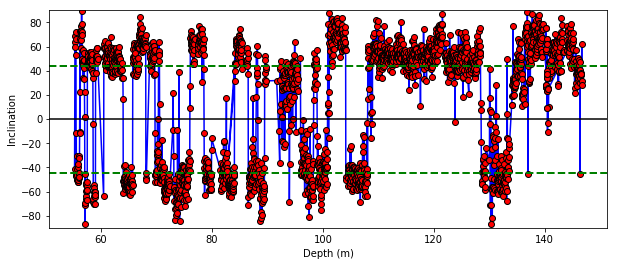

In [66]:
plt.figure(1,(10,4))
plt.plot(data['core_depth'],data['dir_inc'],'b-')
plt.plot(data['core_depth'],data['dir_inc'],'ro',markeredgecolor='black') # plot the data
plt.axhline(0,color='black') # decorate with zero line
lat=np.radians(26) # latitude in radians
gad=np.degrees(np.arctan(2.*np.tan(lat))) # tan (I) = 2 tan (lat)
plt.axhline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axhline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.xlabel('Depth (m)')
plt.ylabel('Inclination')
plt.ylim(-90,90); # set bounds for inclination

Hmm.  The inlinations look a little steeper than expected.  Oh, I looked up where it was and googled around about Site 522 and found this paper by Tauxe et al. (1983) [https://doi.org/10.1111/j.1365-246X.1983.tb03318.x] which says that it is the northward motion of the African plate. Makes sense.  

## Problem 1c:

We are asked to plot inclination versus age and plot the magnetic timescale for the Oligocene.   I went to the stratigraphy.org website and downloaded this neat figure from which I learned that the Oligocene lasted from about 34 to 23 Ma.   

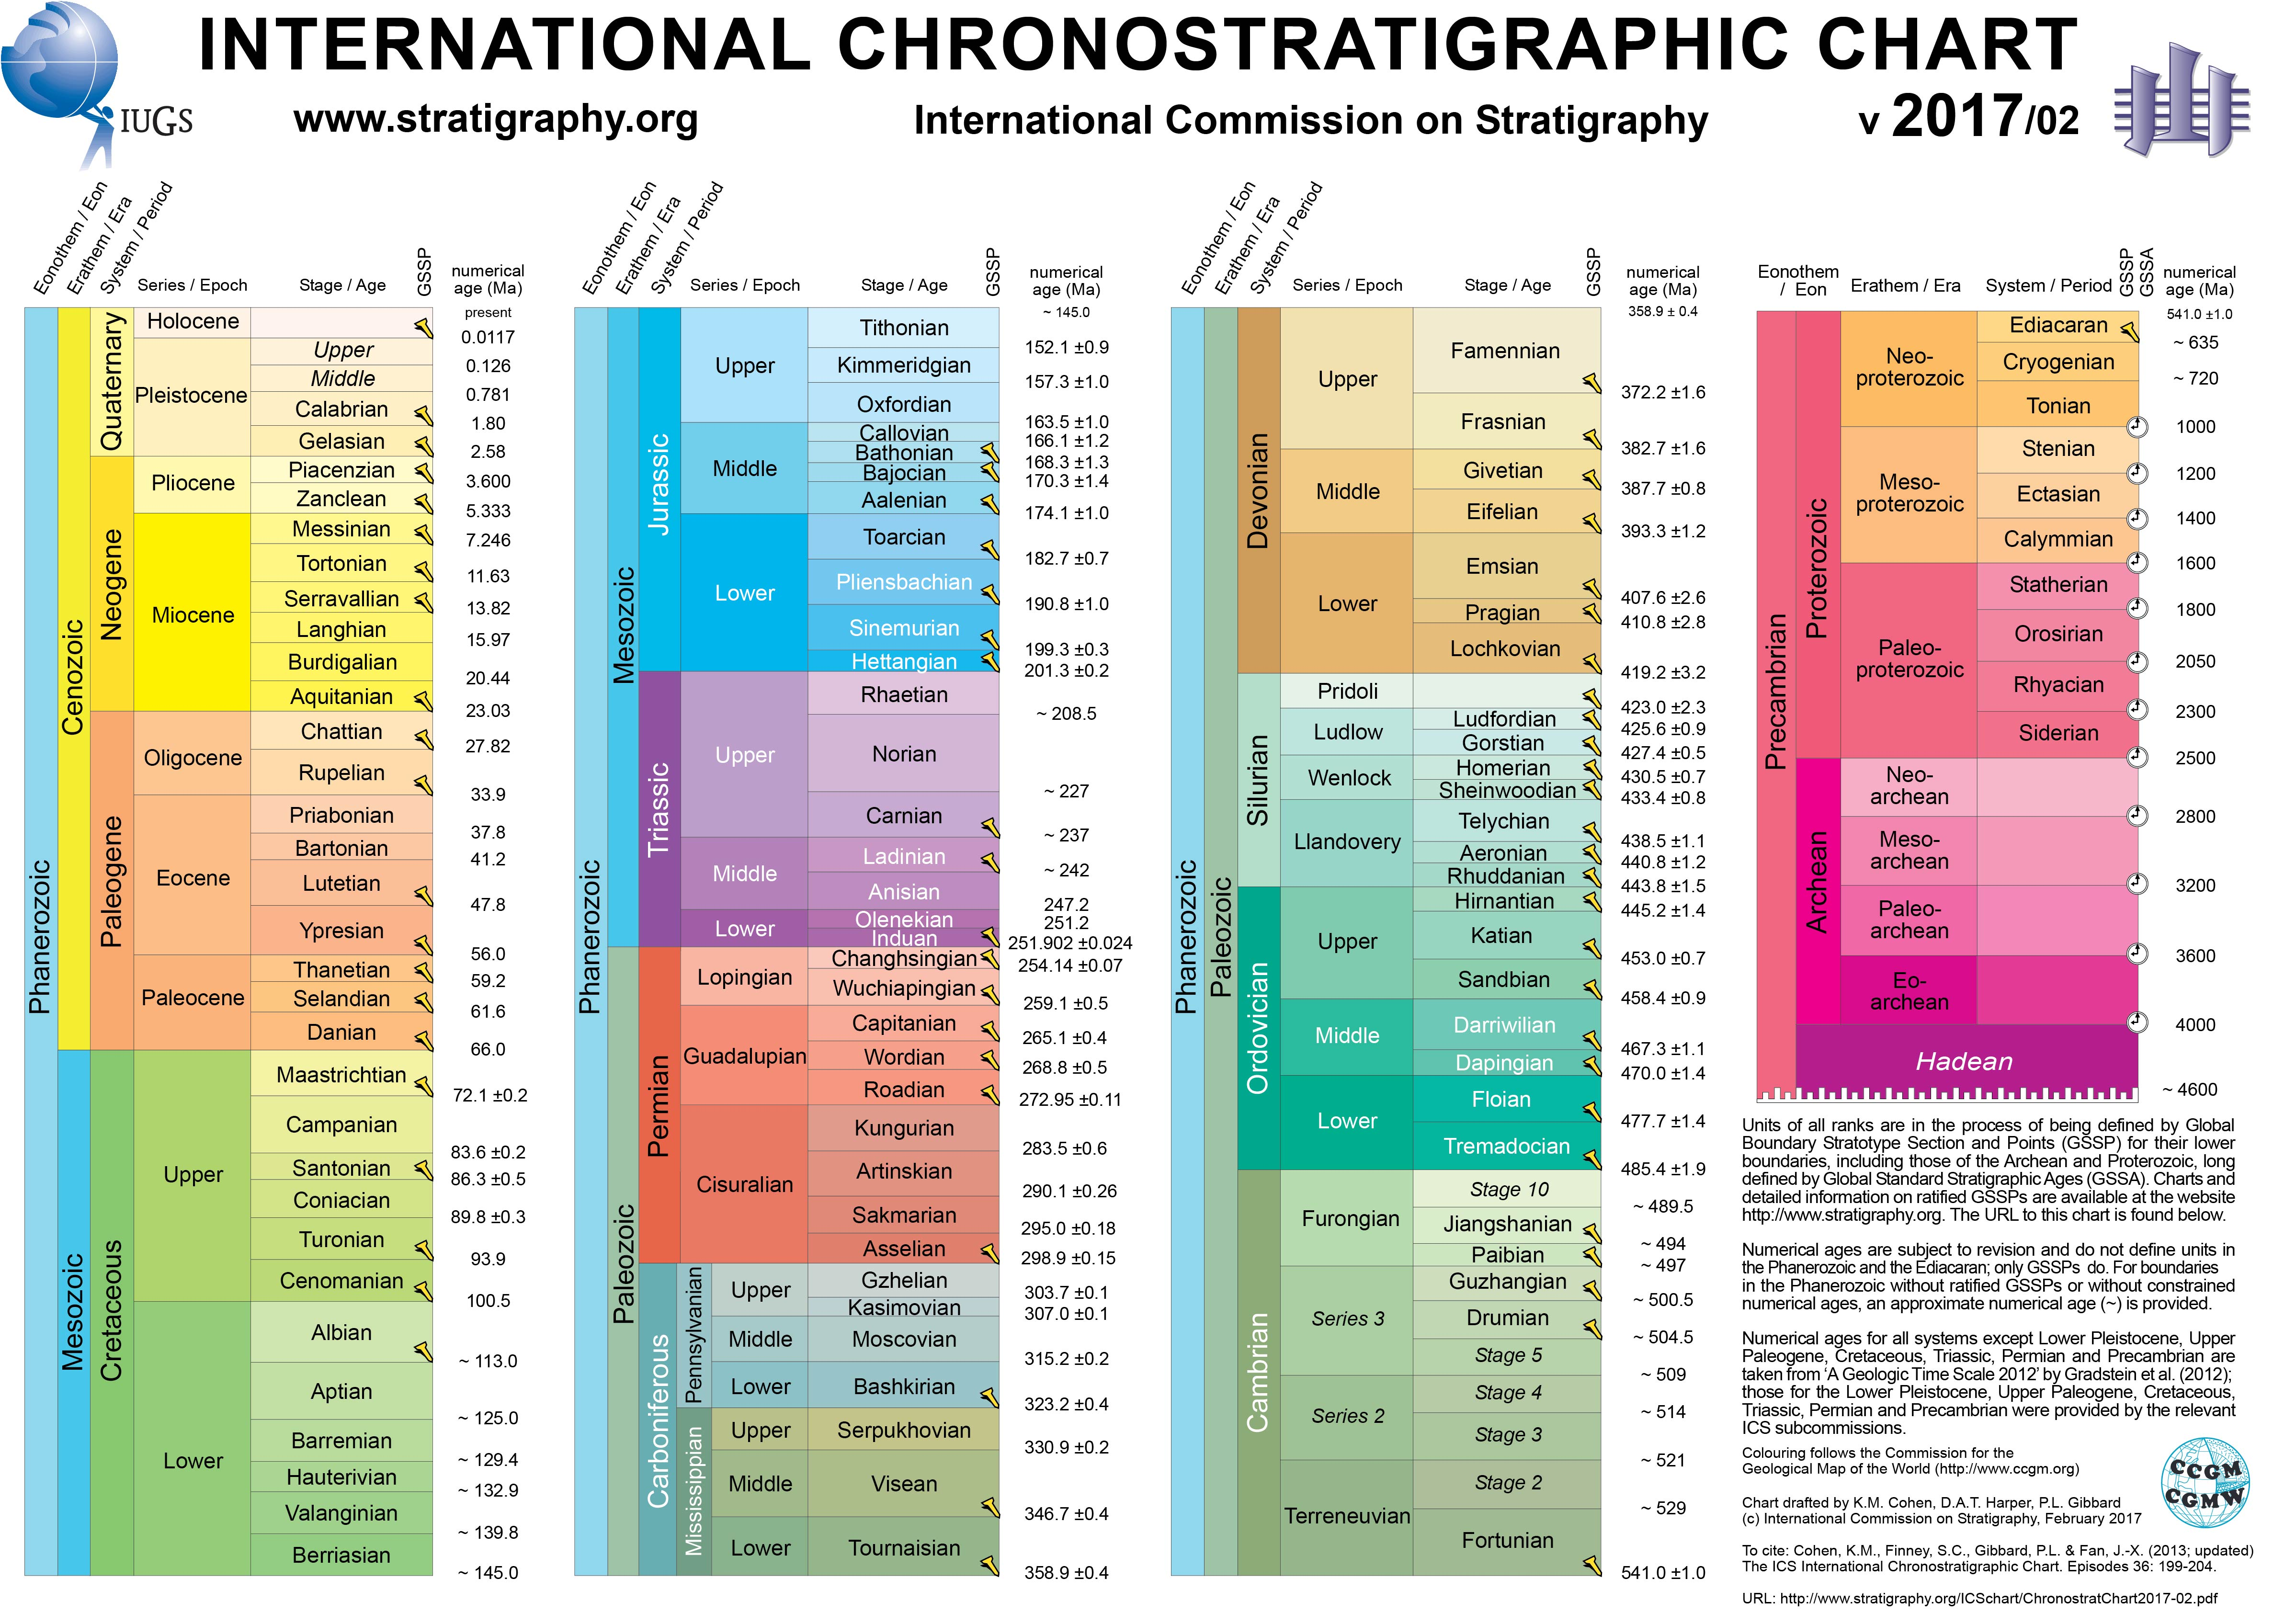

In [67]:
Image(filename='ChronostratChart2017-02.jpg')

So now I look in my **data** DataFrame to find inclination (dir_inc) and age and  to plot inclination versus age and the time scale from 23 to 34 Ma.

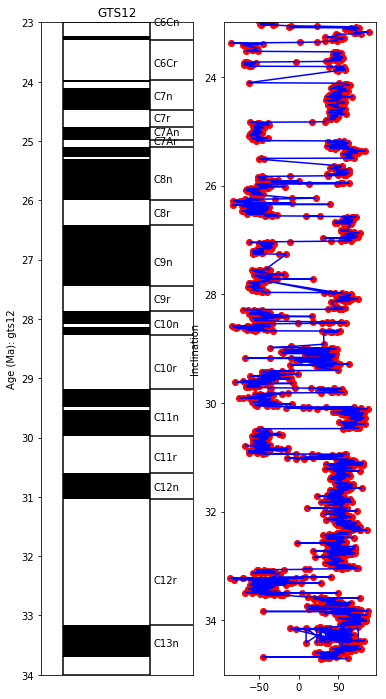

In [68]:
fig=plt.figure(1,(6,12))
ax=fig.add_subplot(121)
agemin,agemax=0,10
pmagplotlib.plot_ts(ax,23,34,timescale='gts12')
ax1=fig.add_subplot(122)
plt.plot(data.dir_inc,data.age,'ro')
plt.plot(data.dir_inc,data.age,'b-')
plt.ylim(35,23)
plt.ylabel('Inclination');



One more little detail - looks like the ages aren't exactly in order, so let us sort the DataFrame by age and replot. 

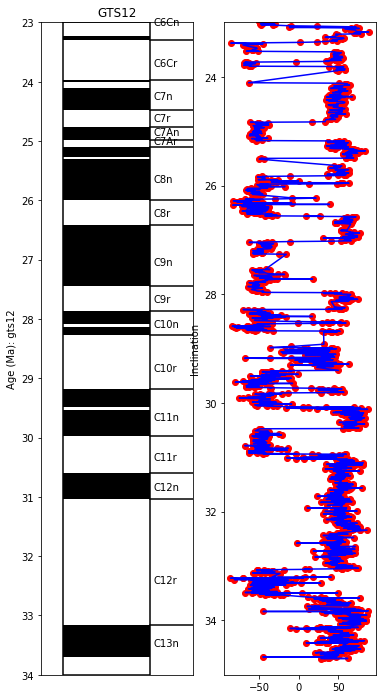

In [69]:
data.sort_values(by='age',inplace=True)
fig=plt.figure(1,(6,12))
ax=fig.add_subplot(121)
agemin,agemax=0,10
pmagplotlib.plot_ts(ax,23,34,timescale='gts12')
ax1=fig.add_subplot(122)
plt.plot(data.dir_inc,data.age,'ro')
plt.plot(data.dir_inc,data.age,'b-')
plt.ylim(35,23)
plt.ylabel('Inclination');



So... it does look like the ages are offset a bit between the author assigned ages and the GTS12 and in fact as this paper was published in 1997, it is impossible that they used GTS12 (published in 2012, duh).  So let's replot this using the 'ck95' time scale.  

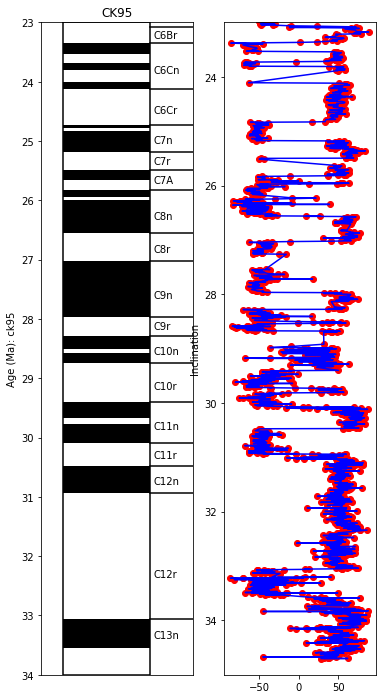

In [71]:
fig=plt.figure(1,(6,12))
ax=fig.add_subplot(121)
agemin,agemax=0,10
pmagplotlib.plot_ts(ax,23,34,timescale='ck95')
ax1=fig.add_subplot(122)
plt.plot(data.dir_inc,data.age,'ro')
plt.plot(data.dir_inc,data.age,'b-')
plt.ylim(35,23)
plt.ylabel('Inclination');



And yes, the CK95 timescale works better.  

## Problem 2a

We already have the data in a Pandas Dataframe (data) and can just plot the 'age' column' against the 'core_depth' column.  Because core_depth increases down in the core, we also have to reverse the sense of the y-axis to make a plot that is geologically sensible. 

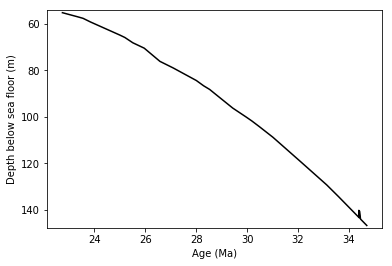

In [75]:
plt.plot(data['age'].values,data['core_depth'],'k-')
plt.ylabel('Depth below sea floor (m)')
plt.xlabel('Age (Ma)')
plt.ylim(data['core_depth'].max()+1,data['core_depth'].min()-1);

## Problem 2b

To get average sedimentation rate, I need to subtract the top and bottom meter levels and divide by the top and bottom age.

In [76]:
DepthRange=data.core_depth.max()-data.core_depth.min()
AgeRange=data.age.max()-data.age.min()
print ('Average sediment accumulation rate was: ','%7.1f'%(DepthRange/AgeRange), 'm/myr')

Average sediment accumulation rate was:      7.7 m/myr


It gets higher down core.  

## Problem 2c

When the ridge crest is shallow, it is much above the Carbonate Compensation Depth (CCD). As the crust ages, it sinks and carbonate dissolution increases.  Also, the CCD was higher in the Miocene in general, so there are probably climatic reasons as well. 

## Problem 2d

So this is a tricky question.  If we use inclination only, we can use **pmag.doincfish( )** (from Chapter 11, Problem 2) to calculate the average inclination.   

In [80]:
help(pmag.doincfish)

Help on function doincfish in module pmagpy.pmag:

doincfish(inc)
    gets fisher mean inc from inc only data
    input: list of inclination values
    output: dictionary of
        'n' : number of inclination values supplied
        'ginc' : gaussian mean of inclinations
        'inc' : estimated Fisher mean
        'r' : estimated Fisher R value
        'k' : estimated Fisher kappa
        'alpha95' : estimated fisher alpha_95
        'csd' : estimated circular standard deviation



So we need to send **pmag.doincfish( )** an array of the inclination values.  

In [81]:
pmag.doincfish(data.dir_inc.values)

{'alpha95': 0.99893142889279896,
 'csd': 20.912559910223429,
 'ginc': 49.993179880647986,
 'inc': 52.673179880647822,
 'k': 15.002223855075576,
 'n': 2346,
 'r': 2189.6898407427352}

But from the description column we glimpsed Problem 1b it appears that someone oriented the declination data....

So  we can use the declination,inclination data and run our old favorite, **pmag.doprinc( )** from Chapter 12. (We can't use **ipmag.fisher_mean( )** without separating data by polarity and I'm feeling lazy.) 

In [82]:
help(pmag.doprinc)

Help on function doprinc in module pmagpy.pmag:

doprinc(data)
    Gets principal components from data in form of a list of [dec,inc] data.
    
    Parameters
    ----------
    data : nested list of dec, inc directions
    
    Returns
    -------
    ppars : dictionary with the principal components



In [84]:
DIs=np.array([data['dir_dec'].values,data['dir_inc'].values]).transpose()
pmag.doprinc(DIs)

{'Edir': array([ 172.19205216,  -36.24358892,    1.        ]),
 'N': 2346,
 'V2dec': 352.19205215690471,
 'V2inc': 36.243588919528449,
 'V3dec': 84.950921162342297,
 'V3inc': 3.756658994758042,
 'dec': 180.04152556412686,
 'inc': 53.498862043458992,
 'tau1': 0.8553721997548438,
 'tau2': 0.081690978123145769,
 'tau3': 0.062936822122010336}

So the principle inclination is 53.5 and the incfish estimate was 52.7.  Not bad.  But now we need to calculate the paleolatitude from the inclination - the opposite of what we did in Problem 1b.  

In [86]:
inc=np.radians(53)  # remember to change to radians. 
print ('Paleolatitude for inclination of 53: ','%7.1f'%(np.degrees(np.arctan(np.tan(inc)/2.))))

Paleolatitude for inclination of 53:     33.6


It is now at 23(S) and this was presumably 33.6 South, so it was heading North.  I know that it was always in the southern hemisphere because if you look at the magstrat - it is the negative inclination intervals that correlate with the normal polarities!  